In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import bootstrap

REPO_ROOT /home/daniel/Projects/meta-lifelong-learning/deep-neuroevolution/multiplai/notebooks/structural_plasticity/../../..


In [3]:
import multiplai.structural_plasticity.clique.clique as c
import multiplai.structural_plasticity.clique.eval as e

In [4]:
import mxnet as mx
import numpy as np
from tqdm import tqdm

import mxnet.ndarray as nd

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
sns.set_style()

In [8]:
cluster_size = 256
n_clusters = 8
n_patterns = 16

In [9]:
patterns = e.generate_unique_random_patterns(n_clusters=n_clusters,
                                             cluster_size=cluster_size,
                                             total_patterns=n_patterns)

In [10]:
patterns


[[  9. 211.  21. 242.  36.  87.  70. 216.]
 [ 23. 207. 141. 117.  85.  48.  49.  69.]
 [ 31. 202. 244. 151. 163. 254. 203. 114.]
 [ 35. 102. 119.  11. 174.  82.  91. 128.]
 [ 38. 232. 244.  17.  79. 132. 105.  42.]
 [ 68.   6. 196.  47. 127. 244. 131. 204.]
 [ 82.  99. 216. 177. 243.  29. 147. 147.]
 [ 88.  81. 165.  25.  77.  72.   9. 148.]
 [ 88. 140.  58. 193. 230.  39.  87. 174.]
 [100. 180. 232.  78. 143. 148. 227. 186.]
 [115. 208. 243. 197. 254.  79. 175. 192.]
 [142.  99.  53. 140. 121. 170.  84. 203.]
 [142. 167.  32. 193.   9. 185. 127.  32.]
 [172.  47. 117. 192.  67. 251. 195. 103.]
 [183.  28.  34. 128. 128. 164.  53. 133.]
 [186.  31. 120.   1.  65. 231. 169.  57.]]
<NDArray 16x8 @cpu(0)>

In [11]:
alayer = e.AssociativeLayer(n_clusters=n_clusters, cluster_size=cluster_size)

In [16]:
print("permanent weights after storing: %d" % nd.sum(alayer.weights > 0.5)[0].asscalar())

permanent weights after storing: 0


In [17]:
# now test recall

In [18]:
drop_fraction = .5


In [19]:
bad_patterns = patterns.copy()
# bad_patterns[:, -1] += 1

In [20]:
errors = check_recall(bad_patterns, drop_fraction=drop_fraction)
len(errors)

NameError: name 'check_recall' is not defined

In [21]:
# NEXT STEP: 
#  plot recall errors vs number of stored patterns
#
#  later: wrap up and test sweep network size, number of patterns, etc
#

In [22]:
for n_patterns in range(0, 30000, 1000):


SyntaxError: unexpected EOF while parsing (<ipython-input-22-29e9d3b29829>, line 1)

In [23]:
import mxnet.profiler as profiler

In [24]:
profiler.set_config(profile_all=True,
                    aggregate_stats=True,
                    continuous_dump=True,
                    filename='profile_output.json')

In [25]:
nd.zeros(2, dtype='float16').dtype

numpy.float16

In [26]:
# %%prun
profiler.set_state('run')
stats, errors, alayer = e.test_store_recall(
    n_patterns=128, 
    n_clusters=8,
    cluster_size=256, 
    drop_fraction=.5,
    dtype='float32',
#     ctx=mx.gpu(0)
)
stats

store_patterns:   1%|          | 1/128 [00:00<00:14,  8.67patterns/s]

prefix clusters, bits: 4 1024


check_recall: 100%|██████████| 128/128 [00:23<00:00,  5.54patterns/s]


{'total_errors': 0,
 'error_rate': 0.0,
 'nonzero_weights': 7988.0,
 'density': 0.0019044876098632812}

In [27]:
profiler.set_state('stop')
print(profiler.dumps())


Profile Statistics:
	Note the difference in units for different entries.
Device Storage
Name                          Total Count    Min Use  (kB)    Max Use  (kB)    Avg Use  (kB)
----                          -----------    -------------    -------------    -------------
Memory: cpu/0                      581402          98.4320       50475.1367       25188.3516

MXNET_C_API
Name                          Total Count        Time (ms)    Min Time (ms)    Max Time (ms)    Avg Time (ms)
----                          -----------        ---------    -------------    -------------    -------------
MXNet C API Calls                 1406784        1406.7841           0.0010        1406.7841         703.3910
MXNDArrayWaitAll                      129        1335.1000           0.0000          16.8400          10.3496
MXNDArraySyncCopyToCPU               1923        9024.1162           0.0010          44.4660           4.6927
MXNDArraySyncCopyFromCPU                4           0.0980           

In [28]:
stats

{'total_errors': 0,
 'error_rate': 0.0,
 'nonzero_weights': 7988.0,
 'density': 0.0019044876098632812}

In [332]:
for error in errors:
    
    target, lookup_key, result = error
    
    print("----------------------------------------------------------------------------")
    print('target:', target[0].asnumpy())
    print('lookup:',lookup_key[0].asnumpy())
    print('result:',result.asnumpy())


----------------------------------------------------------------------------
target: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [333]:
# NEXT STEP: WTF IS WITH THIS NON-UNIQUE PREFIXES

In [ ]:
plt.figure(figsize=(20,20))
e.plot_weight_graph(alayer.weights, alayer.cluster_size, 
                    activations=target[0].asnumpy())
plt.title('target')

In [ ]:
plt.figure(figsize=(20,20))
e.plot_weight_graph(alayer.weights, alayer.cluster_size, 
                    activations=lookup_key[0].asnumpy())
plt.title('lookup');

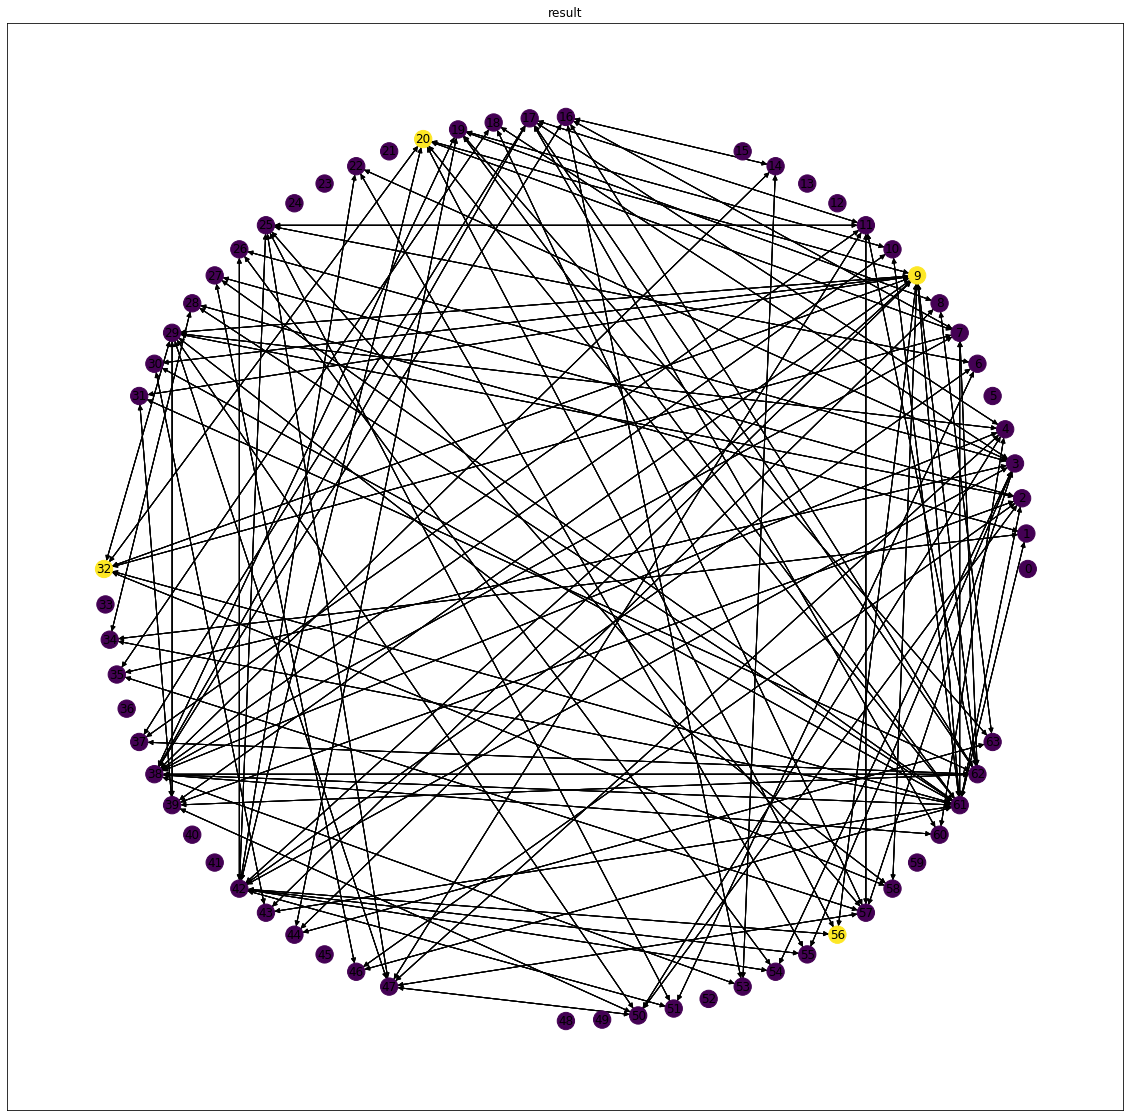

In [317]:
plt.figure(figsize=(20,20))
e.plot_weight_graph(alayer.weights, alayer.cluster_size, 
                    activations=result.asnumpy())
plt.title('result');


## sweep patterns and plot error, density vs number of patterns stored

In [31]:
import IPython.display as display

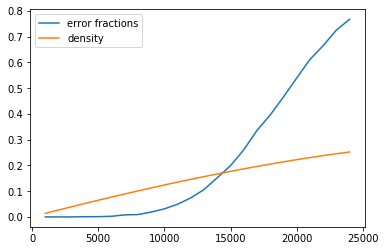

n_patterns 25000


check_recall:  57%|█████▋    | 14201/25000 [17:12<15:17, 11.78patterns/s]

KeyboardInterrupt: 

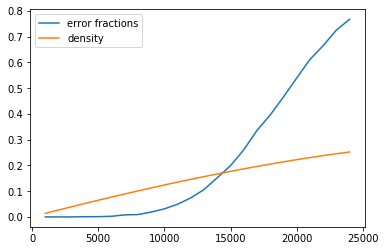

In [49]:
all_stats = []

error_fractions = []
densities = []

import sys
import time


for n_patterns in range(1000, 30000, 1000):
    print("n_patterns", n_patterns)
    sys.stdout.flush()


    stats, errors, alayer = e.test_store_recall(
        n_patterns=n_patterns, 
        n_clusters=8,
        cluster_size=256, 
        drop_fraction=.5,
        dtype='float32',
    #     ctx=mx.gpu(0)
    )
    
    # TODO: analyze errors at bit level, plot that also!
    
    all_stats.append(stats)
    
    error_fractions.append((n_patterns,stats['error_rate']))
    densities.append((n_patterns,stats['density']))
    
    display.clear_output(wait=True)      
    plt.clf()
    plt.plot(*zip(*error_fractions), label='error fractions')
    plt.plot(*zip(*densities), label='density')
    plt.legend()
    display.display(plt.gcf())
    time.sleep(.1)


    
    